In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
#import warnings
#warnings.filterwarnings('ignore')


# Data maninpulation, transformation, aggregation and analysis 
**Task list**
- overall view
- convert datatype to datetime for timeseries
- replacing missing data with NaN then replace NaN with mean_value

In [59]:
df = pd.read_csv("Tinput.csv")
features = ['Date','Qden','Thucdo']

In [60]:
df[features].head(20)

,Date,Qden,Thucdo
0,9/16/2015,91,0.0
1,9/17/2015,70.77,3.6
2,9/18/2015,117.44,6.4
3,9/19/2015,146.9,0.9
4,9/20/2015,110.87,0.5
5,9/21/2015,101.45,0.1
6,9/22/2015,141.78,20.6
7,9/23/2015,126.33,6.6
8,9/24/2015,97.74,0.2
9,9/25/2015,99.83,0.0


In [61]:
df[features].tail(20)

,Date,Qden,Thucdo
2339,2/10/2022,41,0.0
2340,2/11/2022,18.05,0.0
2341,2/12/2022,31.2,0.4
2342,2/13/2022,43.95,0.0
2343,2/14/2022,27.6,0.0
2344,2/15/2022,11.3,0.0
2345,2/16/2022,20.15,0.0
2346,2/17/2022,29.45,0.0
2347,2/18/2022,22.67,0.0
2348,2/19/2022,10.2,0.0


In [62]:
df[features].describe()

,Thucdo
count,2359.000000
mean,3.529843
std,11.969361
min,0.000000
25%,0.000000
50%,0.000000
75%,0.400000
max,198.800000


In [63]:
print(f'Shape of data : {df.shape}')

Shape of data : (2359, 3)


In [64]:
print(f'Data type : {df.dtypes}')

Data type : Date       object
Thucdo    float64
Qden       object
dtype: object


In [65]:
df['Date'] = [pd.to_datetime(x) for x in df['Date']]
df.sort_values('Date', inplace=True)
print(f'Data type : {df.dtypes}')

Data type : Date      datetime64[ns]
Thucdo           float64
Qden              object
dtype: object


In [66]:
print(f"Dataframe start at: {min(df['Date'])}")
print(f"Dataframe end at: {max(df['Date'])}")

Dataframe start at: 2015-09-16 00:00:00
Dataframe end at: 2022-03-01 00:00:00


In [67]:
df['Qden'] = pd.to_numeric(df['Qden'], errors='coerce')
mean_value = np.mean(df['Qden'])
print(f'Qden mean value : {mean_value}')
missing_count = df['Qden'].isnull().sum()
print("Number of missing values:", missing_count)


Qden mean value : 108.41560051107327
Number of missing values: 11


In [68]:
df['Qden'].fillna(mean_value,inplace = True)
missing_count = df['Qden'].isnull().sum()
print("Number of missing values:", missing_count)

Number of missing values: 0


In [69]:
std_deviation = df.std()
print("Standard deviation of dataframe:")
print(std_deviation)

Standard deviation of dataframe:
Date      681 days 03:05:42.557270568
Thucdo                      11.969361
Qden                       141.812675
dtype: object


In [70]:
print(f"Number of observations:",len(df))

Number of observations: 2359


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2359 non-null   datetime64[ns]
 1   Thucdo  2359 non-null   float64       
 2   Qden    2359 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 55.4 KB


<Axes: >

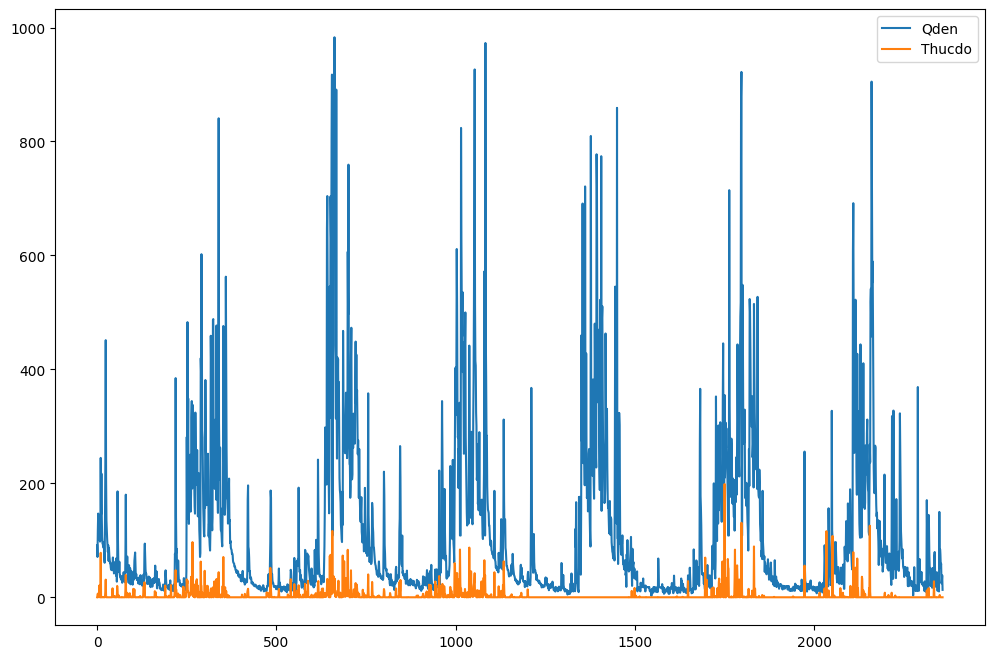

In [72]:
df[['Qden','Thucdo']].plot(figsize=(12,8))

In [73]:
stepwise_fit = auto_arima(df['Qden'],trace = True,suppress_warnings=True)

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=27504.404, Time=2.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=30072.916, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=27738.611, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=28762.799, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=31156.997, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=27511.528, Time=1.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=27503.517, Time=1.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=27599.737, Time=0.70 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=27663.635, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=27504.653, Time=1.44 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=27586.715, Time=0.28 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=27512.785, Time=0.70 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.023 seconds


In [74]:
arima_model = ARIMA(df['Qden'], order=(2,1,5))
model =arima_model.fit()
aic = model.aic
print("AIC:", aic)
model.summary() 

AIC: 27510.986769672618


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Qden   No. Observations:                 2359
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -13747.493
Date:                Sun, 24 Mar 2024   AIC                          27510.987
Time:                        12:39:14   BIC                          27557.111
Sample:                             0   HQIC                         27527.782
                               - 2359                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1779      0.125     -1.419      0.156      -0.424       0.068
ar.L2          0.8015      0.118      6.818      0.000       0.571       1.032
ma.L1         -0.2466      0.126     -1.957      0.050      -0.494       0.000
ma.L2         -1.0902      0.154     -7.070      0.000      -1.392      -0.788
ma.L3          0.2603      0.040      6.439      0.000       0.181       0.340
ma.L4          0.1415      0.027      5.231      0.000       0.088       0.194
ma.L5          0.0101      0.018      0.567      0.570      -0.025       0.045
sigma2      6811.3414     63.274    107.648      0.000    6687.327    6935.356
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             47950.95
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             2.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
arima_model2 = ARIMA(df['Qden'], order=(2,0,1))
model2 = arima_model2.fit()
aic2 = model2.aic
print("AIC:", aic2)
model2.summary() 

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AIC: 27503.520148515498


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Qden   No. Observations:                 2359
Model:                 ARIMA(2, 0, 1)   Log Likelihood              -13746.760
Date:                Sun, 24 Mar 2024   AIC                          27503.520
Time:                        12:39:15   BIC                          27532.350
Sample:                             0   HQIC                         27514.018
                               - 2359                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.4107     47.223      2.296      0.022      15.855     200.967
ar.L1          1.3918      0.020     70.149      0.000       1.353       1.431
ar.L2         -0.4042      0.018    -22.856      0.000      -0.439      -0.370
ma.L1         -0.8304      0.015    -55.424      0.000      -0.860      -0.801
sigma2      6743.1722     88.869     75.878      0.000    6568.992    6917.352
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             53982.35
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             2.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
train = df.iloc[:235]
test = df.iloc[-235:]
print(df.shape,'\t',df.shape,'\t',test.shape)

(2359, 3) 	 (2359, 3) 	 (235, 3)


In [77]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start = start,end = end,typ = 'levels')
print(pred)

235    27.341865
236    27.603683
237    25.333057
238    24.600727
239    25.228950
         ...    
465    19.371116
466    14.286360
467    16.329462
468    16.107397
469    14.966995
Name: predicted_mean, Length: 235, dtype: float64


In [78]:
def ad_test(dataset):
    dftest = adfuller(dataset,autolag = 'AIC')
    print("1. ADF :",dftest[0])
    print("2. P-value :",dftest[1])
    print("3. Num of lags :",dftest[2])
    print("4. NUmber of Observation use for ADF :",dftest[3])
    print("5. Critical Values:")
    critical_values = dftest[4]
    for key in critical_values:
        value = critical_values[key]
        print(f"\t{key}: {value}")

In [79]:
ad_test(df['Qden'])

1. ADF : -4.0903419436336605
2. P-value : 0.0010047451115681016
3. Num of lags : 25
4. NUmber of Observation use for ADF : 2333
5. Critical Values:
	1%: -3.4331560478447343
	5%: -2.8627796580313234
	10%: -2.567429924573145


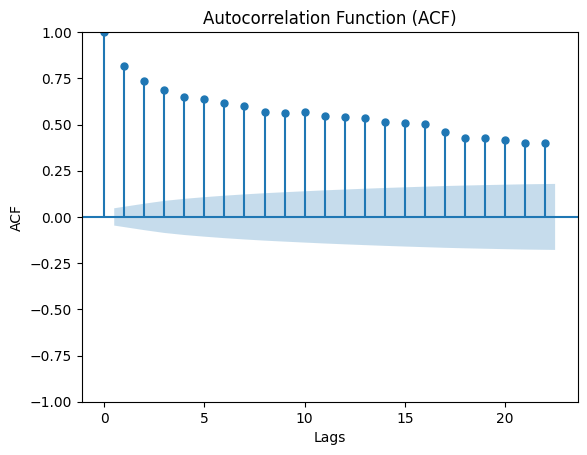

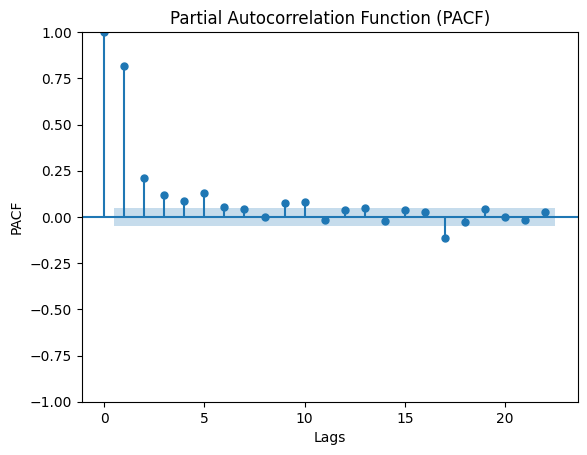

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df2 = pd.read_csv('test.csv')
df2['Qden'] = pd.to_numeric(df2['Qden'], errors='coerce')
df2['Thucdo'] = pd.to_numeric(df2['Thucdo'], errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.dropna(subset=['Qden', 'Thucdo', 'Date'])

# Extract the specific column for ACF and PACF analysis
qden_values = df2['Qden']
thucdo_values = df2['Thucdo']

# ACF plot
plot_acf(qden_values, lags=22)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# PACF plot
plot_pacf(qden_values, lags=22)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [81]:
def find_d_value(ts, max_d=5):
    for d in range(1, max_d+1):
        # Kiểm định ADF
        ts_diff = ts.diff(d).dropna()
        result = adfuller(ts_diff)

        p_value = result[1]
        adf_statistic = result[0]
        critical_values = result[4]

        print('ADF Statistic:', adf_statistic)
        print('p-value:', p_value)
        print('Critical Values:', critical_values)

        if p_value < 0.05:
            print(f'Số lần sai phân: {d}')
            break
    else:
        print('Không tìm thấy giá trị d phù hợp.')

In [82]:

rmse = sqrt(mean_squared_error(pred,test['Qden']))
